The Mall customers dataset contains information about people visiting the mall. The dataset has gender, customer id, age, annual income, and spending score. It collects insights from the data and group customers based on their behaviors.

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('Mall_Customers.csv', index_col = ['CustomerID'])
data = data.rename(columns = {'Genre' : 'Gender'})
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

## Gender Factor Analysis

In [7]:
gender_analysis = data.groupby('Gender').mean()
gender_analysis

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


Let's look at the correlation between Annual Income and Spending Score. It will give us an insight on shopping habits of households with different incomes. 

In [8]:
spending = data[['Gender','Annual Income (k$)', 'Spending Score (1-100)']]
spending.corr()

,Annual Income (k$),Spending Score (1-100)
Annual Income (k$),1.000000,0.009903
Spending Score (1-100),0.009903,1.000000


The above correlation matrix does not show a very strong relationship of Spending Score with income.

Let's see if the Gender plays any role in spending and income.

In [9]:
spending[spending['Gender'] == 'Male'].corr()

,Annual Income (k$),Spending Score (1-100)
Annual Income (k$),1.000000,-0.023684
Spending Score (1-100),-0.023684,1.000000


Correlation matrix shows **negative relation** between spending and income of **male** consumers, which implies males with higher incomes tend to shop less.

In [10]:
spending[spending['Gender'] == 'Female'].corr()

,Annual Income (k$),Spending Score (1-100)
Annual Income (k$),1.000000,0.047542
Spending Score (1-100),0.047542,1.000000


The data shows a **moderate correlation** between income and spending habits of female shoppers. Its more probable that female shoppers will show an increase in shopping with increase in their income.

Let's plot this relationship.

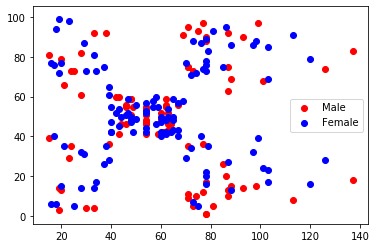

In [11]:
fig, ax = plt.subplots()
plt.xlabel = 'Income (in k$)'
plt.ylabel = 'Shopping Score (1- 100)'
plt.scatter(spending[spending['Gender'] == 'Male']['Annual Income (k$)'], spending[spending['Gender'] == 'Male']['Spending Score (1-100)'], marker = 'o', c = 'red', label = 'Male')
plt.scatter(spending[spending['Gender'] == 'Female']['Annual Income (k$)'], spending[spending['Gender'] == 'Female']['Spending Score (1-100)'], marker = 'o', c = 'blue', label = 'Female')
ax.legend()
plt.show()

## Age Factor Analysis

In [12]:
data['bins'] = pd.cut(data['Age'], [17, 24, 34, 44, 54, 64, 100], labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+'])
data.groupby('bins')[['Annual Income (k$)', 'Spending Score (1-100)']].corr()

Annual Income (k$)  Spending Score (1-100)
bins                                                                    
18-24 Annual Income (k$)                1.000000               -0.635172
      Spending Score (1-100)           -0.635172                1.000000
25-34 Annual Income (k$)                1.000000                0.047259
      Spending Score (1-100)            0.047259                1.000000
35-44 Annual Income (k$)                1.000000                0.144812
      Spending Score (1-100)            0.144812                1.000000
45-54 Annual Income (k$)                1.000000               -0.149396
      Spending Score (1-100)           -0.149396                1.000000
55-64 Annual Income (k$)                1.000000               -0.036400
      Spending Score (1-100)           -0.036400                1.000000
65+   Annual Income (k$)                1.000000                0.733683
      Spending Score (1-100)            0.733683                1.000000

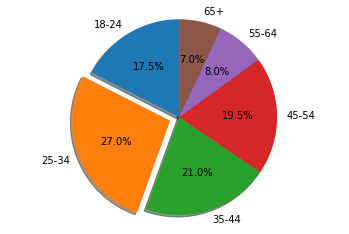

In [13]:
explode = [0, 0.1, 0, 0, 0, 0]
fig1, ax1 = plt.subplots()
ax1.pie(data.groupby('bins')['Age'].count(), explode=explode, labels=data.groupby('bins')['Age'].count().index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

As can be seen in the above pie-chart, Age group 25-34 forms more than quarter of the customer base for Mall in the given dataset. The correlation matrix also shows direct correlation between spending and annual income of the people in the age group. This represents that the people aged 25-34 are spending more when their income rises and also form the biggest portion of customer base. This can be further expanded by targeting the customers in this age segment.